In [ ]:
# The Olivetti faces dataset
# 올리베티 얼굴 데이터셋
# 1992~1994 AT&T와 캠브리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터베이스
# 40명의 흑백 얼굴 사진 400장, 4096 (64x64) 특성
# 0.0~1.0 (0~255 를 스케일링)

In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

print(len(faces.data))
print(set(faces.target))

400
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


In [5]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [2]:
faces.data.shape  # 이미지 400장, 64x64(4096픽셀)

(400, 4096)

In [3]:
faces.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

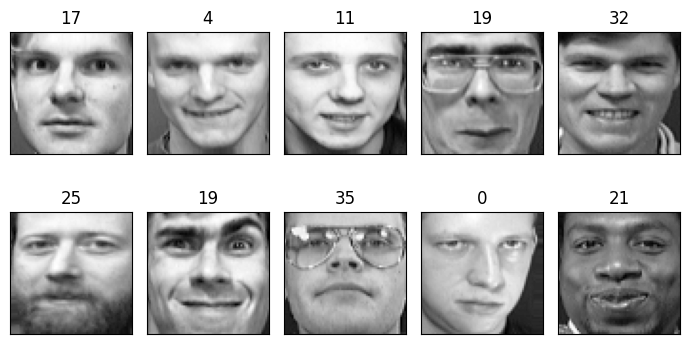

In [6]:
import matplotlib.pyplot as plt
import numpy as np

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(7,4))
#컬러맵: https://matplotlib.org/tutorials/colors/colormaps.html
klist = np.random.choice(range(len(faces.data)), N*M)
                        # 400, 0~399 중에서, 2*5 = 10장 뽑아내기
for i in range(N):
    for j in range(M):
        k = klist[i*M + j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(faces.images[k], cmap = plt.cm.gray)
        ax.xaxis.set_ticks([])   # 눈금제거
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()  # 여백조절
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(faces.data, faces.target, test_size=0.2, stratify=faces.target, random_state=10)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# model
svc = SVC().fit(x_tr, y_tr)

In [16]:
import sys
print(sys.getsizeof(x_tr)/(1024*1024))  # 메모리용량계산

5.0001220703125


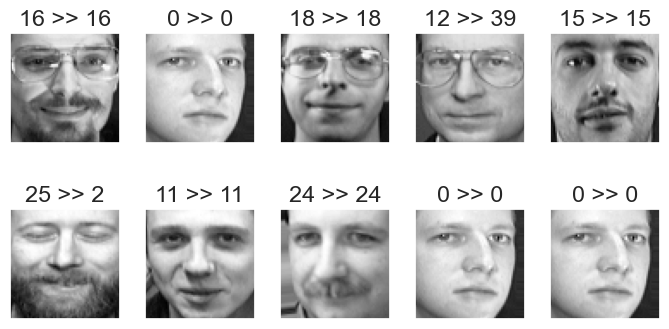

In [25]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(7,4))
#컬러맵: https://matplotlib.org/tutorials/colors/colormaps.html
klist = np.random.choice(range(len(y_ts)), N*M)
for i in range(N):
    for j in range(M):
        k = klist[i*M + j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(x_ts[k:(k+1), :].reshape(64,64), cmap = plt.cm.gray)
        # ax.imshow(x_ts[k:(k+1), :].reshape(64,64))
        ax.xaxis.set_ticks([])   # 눈금제거
        ax.yaxis.set_ticks([])
        pred = svc.predict(x_ts[k:(k+1), :])[0]
        plt.title(f'{y_ts[k]} >> {pred}')
plt.tight_layout()  # 여백조절
plt.show()

In [18]:
print('학습용: ', svc.score(x_tr, y_tr))
print('검증용: ', svc.score(x_ts, y_ts))

학습용:  1.0
검증용:  0.9125


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

pred = svc.predict(x_ts)
cm = confusion_matrix(y_ts, pred)   # 정오분류표
cm

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=int64)

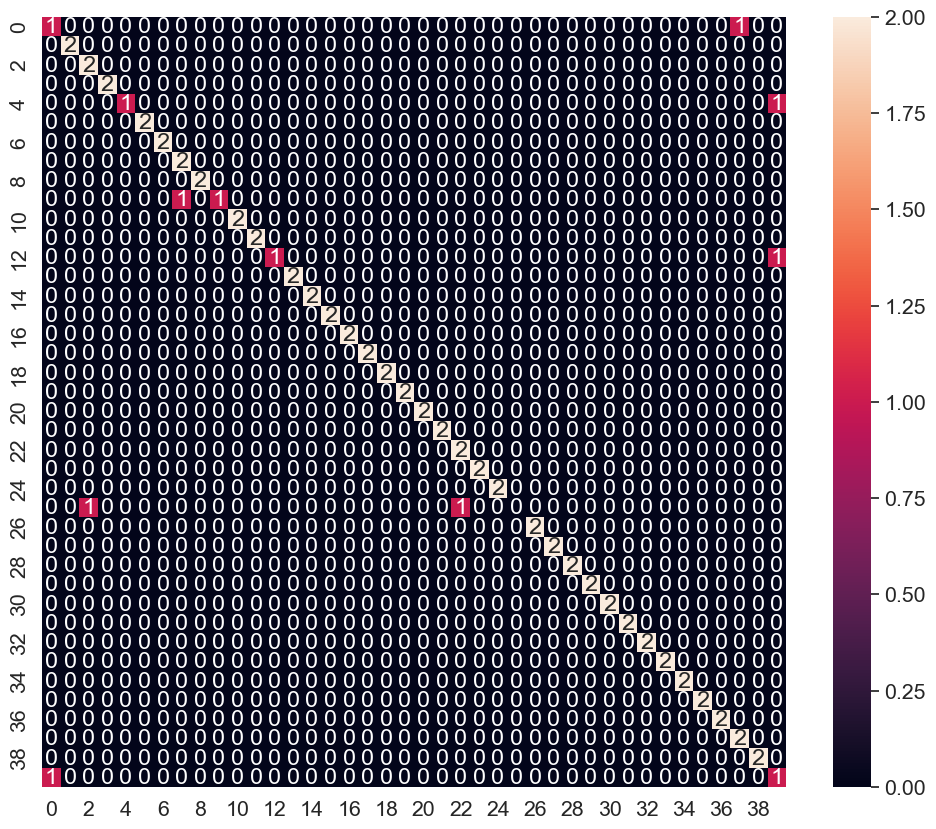

In [23]:
df_cm = pd.DataFrame(cm, index = range(0,40), columns = range(0,40))
sns.set(font_scale = 1.4)
plt.figure(figsize = [12,10])
sns.heatmap(df_cm, annot=True)
plt.show()

In [21]:
print(classification_report(y_ts, pred))
# class 4,7은 정확도가 낮음(f1-score 기준)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


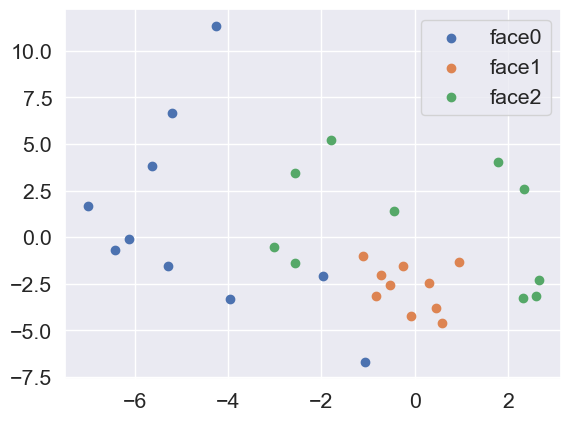

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2, random_state = 10)
components = pca.fit_transform(faces.data)
df = pd.DataFrame(data = components, columns = ['component1','component2'])
df.index = faces.target

for i in range(3):
    plt.scatter(df.iloc[faces.target == i,0], df.iloc[faces.target==i, 1], label = f'face{i}')
    plt.legend()
plt.show()